<!--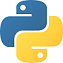 -->
# 12 DFS and BFS 
### Depth-First Search (DFS) and Breadth-First Search (BFS)



## Plan for the lecture 

1. Recap on Trees

2. Breadth-First Search with a Queue 

3. Depth-First Search with a Stack


# Reminder about Trees 

* Trees have a root node (top of the tree), from which branches stem (child nodes). The children that do not have branches (descendents) are known as leaf nodes.

 ![Treesgif](http://www.thecrazyprogrammer.com/wp-content/uploads/2017/08/Tree-Data-Structure.gif)


* We contrasted the (non-binary) tree, the Binary Tree and the Binary Search Tree (BST).

* Like Binary Search, we saw that a BST has to be configured in a particular format to enable logarithmic search. 

* Each parent/root node can only have two children - a leftchild which has a value less than the root, and a rightchild which has a value greater than the root. 

 ![BST_arrange](https://blog.penjee.com/wp-content/uploads/2015/12/optimal-binary-search-tree-from-sorted-array.gif)

## Non-binary Tree

In [160]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 
        
    def delete_child(self, child_node):
        self.children.remove(child_node)

In [161]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [162]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

## Binary Search Tree 


In [163]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [164]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
                
    def in_order_traversal(self):
        self._in_order_recursive(self.root)
        print()  # New line after traversal

    def _in_order_recursive(self, node):
        if node:
            self._in_order_recursive(node.left)
            print(node.value, end=" ")
            self._in_order_recursive(node.right)
            
    def search(self, value):
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None:
            return False
        if node.value == value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)

In [165]:
bst = BinarySearchTree()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

In [166]:
print("In-order Traversal:")
bst.in_order_traversal()  # Output: 20 30 40 50 60 70 80

In-order Traversal:
20 30 40 50 60 70 80 


# Breadth-First Search (BFS) vs. Depth-First Search (DFS)

* A breadth-first search is when you inspect every node on a level starting at the top of the tree and then move to the next level. 

* A depth-first search is where you search deep into a branch and don’t move to the next one until you’ve reached the end. 

* Each approach has unique characteristics but the process for each one is almost exactly the same. 

* The only difference in their approach is how they store the nodes that need to be searched next. These nodes are known as the frontier.

![](https://media.geeksforgeeks.org/wp-content/uploads/20240219134945/bfs-vs-dfs-(1).png)

## Recap on Stacks - LIFO 

* A stack follows “Last In First Out” (LIFO) behavior which means that the most recent data added will be the first to leave. 

* To get to a book at the bottom of a stack of books you must first remove the books that were more recently placed in the stack. 

*

<img src="https://scaler.com/topics/images/working-of-stack-in-java.gif" alt="stack_gif" width="650"> 

In [5]:
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        """Push an item onto the stack."""
        self.items.append(item)

    def pop(self):
        """Pop an item off the stack. Returns None if the stack is empty."""
        if not self.is_empty():
            return self.items.pop()
        return None

    def peek(self):
        """Peek at the top item of the stack without removing it."""
        if not self.is_empty():
            return self.items[-1]
        return None

    def is_empty(self):
        """Check if the stack is empty."""
        return len(self.items) == 0

In [167]:
s = Stack()
s.push(7)
s.push(18)
s.push(20)

In [168]:
while s.is_empty() == False:
    print(s.pop())


20
18
7


## Depth-First Search Using a Stack

* Frontier nodes stored in a stack create the deep dive of a depth-first search. 

* Nodes added to the frontier early on can expect to remain in the stack while their sibling’s children (and their children, and so on) are searched. 

* Depth-first search is not considered a complete algorithm since searching an infinite branch in a tree can go on forever. In this situation, an entire section of the tree would be left un-inspected.

## Recap on Queues - FIFO

* The queue and the stack are the two data structures that can be used for storing nodes in a search frontier. 

* A queue follows “First In First Out” (FIFO) behavior, where the order the data goes in the queue is the order it leaves the queue. 

* This equates to any line you may have stood on to wait for the bus or to grab a cup of coffee.

<img src="https://www.scaler.com/topics/images/working-of-java-queue.gif" alt="stack_gif" width="650">  

In [169]:
class Queue:
    def __init__(self):
        """Initialize an empty queue."""
        self.items = []

    def enqueue(self, item):
        """Add an item to the back of the queue."""
        self.items.append(item)

    def dequeue(self):
        """Remove and return the front item of the queue. Returns None if the queue is empty."""
        if not self.is_empty():
            return self.items.pop(0)
        return None

    def peek(self):
        """Return the front item of the queue without removing it."""
        if not self.is_empty():
            return self.items[0]
        return None

    def is_empty(self):
        """Check if the queue is empty."""
        return len(self.items) == 0

In [170]:
q = Queue()
q.enqueue(10)
q.enqueue(20)
q.enqueue(30)

In [171]:
while q.is_empty() == False:
    print(q.dequeue())

10
20
30


## Breadth-First Search Traversal Using a Queue

* Storing the frontier nodes in a queue creates the level-by-level pattern of a breadth-first search. 

* Child nodes are searched in the order they are added to the frontier. The nodes on the next level are always behind the nodes on the current level. 

* Breadth-first search is known as a complete algorithm since no matter how deep the goal is in the tree it will always be located.

* We shall see that <b>Dijkstra's path-finding algorithm</b> will adapt Breadth-First Search, and will also use a priority queue. 

## The Breadth-First Search (BFS) Algorithm

Key point - BFS uses a QUEUE to store each level at a time. 

- 1 - Add root node to the queue 
- 2 - Check the contents of the queue - is the root node the goal (target)? Remember the items of the queue are removed once checked (dequeued)
- 3 - If not, add the descendents of the root to the queue 
- 4 - Check the contents of the queue - is the goal (target) one of the nodes in the queue?
- 5 - If not, add the descendents of the contents of the queue (or what was there if removed)
- 6 - Check the contents - is the goal one of the nodes in the queue?

<b>Revision question: In what order are items added and removed from the queue?</b>

<!--![BFS](Breadth-First-Tree-Traversal.gif)-->

<img src="Breadth-First-Tree-Traversal.gif" alt="DFS_paths" width="850">  


In [173]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

In [175]:
from collections import deque

def bfs_with_queue(root):
    if root is None:
        return

    queue = deque([root])  # Initialize the queue with the root node

    while queue:
        current = queue.popleft()  # Dequeue the front node
        print(current.value)  # Process the current node (e.g., print its value)

        # Enqueue all children of the current node
        for child in current.children:
            queue.append(child)

In [177]:
root = TreeNode("root")
child_a = TreeNode("A")
child_b = TreeNode("B")
child_c = TreeNode("C")
child_d = TreeNode("D")
child_e = TreeNode("E")

root.add_child(child_a)
root.add_child(child_b)
child_a.add_child(child_c)
child_a.add_child(child_d)
child_b.add_child(child_e)

print("BFS Traversal:")
bfs_with_queue(root)

BFS Traversal:
root
A
B
C
D
E


## Breadth-First-Search for Path Finding

The breadth-first search is a tree traversal algorithm that searches a tree level by level. The search starts with the root node and works its way through every sibling node on a level before moving deeper into the tree. There are multiple ways to implement a breadth-first search. In this lesson, we will use an iterative approach that involves maintaining a collection of nodes in a frontier queue.

Here are the steps needed to implement this search algorithm:

- Import values into a tree data structure
- Determine the root node of the tree and the goal value to search for
- Create a queue of node paths that lead to the nodes that need to be searched
- Get a path from the queue to obtain the next node to search
- If the goal value isn’t found in the node, add a path to the queue for each of the node’s children


In [179]:
class TreeNode:
  def __init__(self, value):
    self.value = value
    self.children = []

  def __repr__(self, level=0):
    # HELPER METHOD TO PRINT TREE!
    ret = "--->" * level + repr(self.value) + "\n"
    for child in self.children:
      ret += child.__repr__(level+1)
    return ret

  def add_child(self, child_node):
    self.children.append(child_node) 

In [180]:
def dequeue(self):
  if self.get_size() > 0:
    item_to_remove = self.head
    print(str(item_to_remove.get_value()) + " is served!")
    if self.get_size() == 1:
      self.head = None
      self.tail = None
    else:
      self.head = self.head.get_next_node()
    self.size -= 1
    return item_to_remove.get_value()
  else:
    print("The queue is totally empty!")

In [181]:
from collections import deque

# Breadth-first search function
def bfs(root_node, goal_value):

  # initialize frontier queue
  path_queue = deque()

  # add root path to the frontier
  initial_path = [root_node]
  path_queue.appendleft(initial_path)
  
  # search loop that continues as long as
  # there are paths in the frontier
  while path_queue:
    # get the next path and node 
    # then output node value
    current_path = path_queue.pop()
    current_node = current_path[-1]
    print(f"Searching node with value: {current_node.value}")

    # check if the goal node is found
    if current_node.value == goal_value:
      return current_path

    # add paths to children to the  frontier
    for child in current_node.children:
      new_path = current_path[:]
      new_path.append(child)
      path_queue.appendleft(new_path)

  # return an empty path if goal not found
  return None

In [183]:
sample_root_node = TreeNode("Home")
docs = TreeNode("Documents")
photos = TreeNode("Photos")
sample_root_node.children = [docs, photos]
my_wish = TreeNode("WishList.txt")
my_todo = TreeNode("TodoList.txt")
my_cat = TreeNode("Fluffy.jpg")
my_dog = TreeNode("Spot.jpg")
docs.children = [my_wish, my_todo]
photos.children = [my_cat, my_dog]

print(sample_root_node)
goal_path = bfs(sample_root_node, "Fluffy.jpg")
if goal_path is None:
  print("No path found")
else:
  print("Path found")
  for node in goal_path:
    print(node.value)

'Home'
--->'Documents'
--->--->'WishList.txt'
--->--->'TodoList.txt'
--->'Photos'
--->--->'Fluffy.jpg'
--->--->'Spot.jpg'

Searching node with value: Home
Searching node with value: Documents
Searching node with value: Photos
Searching node with value: WishList.txt
Searching node with value: TodoList.txt
Searching node with value: Fluffy.jpg
Path found
Home
Photos
Fluffy.jpg


## Preview of Graph Path Finding - BFS Graph Traversal

In [187]:
def bfs_with_queue(graph, start):
    queue = Queue()  # Initialize the queue
    queue.enqueue(start)  # Start with the root or start node
    visited = set()  # Keep track of visited nodes

    while not queue.is_empty():
        current = queue.dequeue()

        if current not in visited:
            print(current)  # Process the current node (e.g., print it)
            visited.add(current)

            # Enqueue all unvisited neighbors
            for neighbor in graph.get(current, []):
                if neighbor not in visited:
                    queue.enqueue(neighbor)

In [188]:
# Define a graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Perform BFS starting from node 'A'
print("BFS Traversal:")
bfs_with_queue(graph, 'A')

BFS Traversal:
A
B
C
D
E
F


## Preview of Graph Path Finding - Path Tracking

In [189]:
from collections import deque

def bfs_find_path(graph, start, target):
    # Initialize the queue with the start node and path as a list with only the start node
    queue = deque([(start, [start])])
    visited = set()  # Keep track of visited nodes

    while queue:
        current, path = queue.popleft()  # Dequeue the front item (node, path)

        if current == target:
            return path  # Return the path once the target is reached

        if current not in visited:
            visited.add(current)

            # Enqueue unvisited neighbors with the path extended
            for neighbor in graph.get(current, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None  # Return None if the target is not reachable from the start

In [190]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Find the path from 'A' to 'F' using BFS
path = bfs_find_path(graph, 'A', 'F')
print("Path to target:", path)  # Output could be: ['A', 'C', 'F'] or ['A', 'B', 'E', 'F']

Path to target: ['A', 'C', 'F']


# The Depth-First Search (DFS) Algorithm

Key point: DFS uses a STACK to store (stack) each descendent as it traverses each branch of the tree.

- 1 - Add root node to the stack
- 2 - Check the contents of the stack - is the root node the goal (target)? Remember the items of the queue are removed once checked (popped off the stack)
- 3 - If not, add the descendents of the root to the stack 
- 4 - Pop the last item from the top of the stack 
- 5 - Check to see if it is the goal (target)
- 6 - If not, push (add) its descendents onto the stack (on top of the other node(s) from level 1)
- 7 - Pop them from the stack one by one to see if they are goal
- 8 - If not, repeat steps 4 - 7 for each branch from level 1

<b> Revision question: In what order are items added and removed from the stack?</b>

<!--![DFS](Depth-First-Tree-Traversal.gif)-->
<img src="Depth-First-Tree-Traversal.gif" alt="DFS_paths" width="850">  




In [191]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

In [193]:
def dfs_with_stack(root):
    if root is None:
        return

    stack = [root]  # Initialize the stack with the root node

    while stack:
        # Pop the last node from the stack
        current = stack.pop()
        print(current.value)  # Process the current node (e.g., print its value)

        # Push children to stack in reverse order
        # to maintain left-to-right order in DFS
        for child in reversed(current.children):
            stack.append(child)

In [195]:
# Create a tree structure
root = TreeNode("root")
child_a = TreeNode("A")
child_b = TreeNode("B")
child_c = TreeNode("C")
child_d = TreeNode("D")
child_e = TreeNode("E")

# Build the tree
root.add_child(child_a)
root.add_child(child_b)
child_a.add_child(child_c)
child_a.add_child(child_d)
child_b.add_child(child_e)


In [196]:
# Perform DFS with a stack
print("DFS Traversal:")
dfs_with_stack(root)

DFS Traversal:
root
A
C
D
B
E


## Depth-First Search for Path Finding in Trees

* Useful for searching an organisational chart, or a file directory! 

In [197]:
class TreeNode:
  def __init__(self, value):
    self.value = value
    self.children = []

  def __repr__(self, level=0):
    # HELPER METHOD TO PRINT TREE!
    ret = "--->" * level + repr(self.value) + "\n"
    for child in self.children:
      ret += child.__repr__(level+1)
    return ret

  def add_child(self, child_node):
    self.children.append(child_node) 

In [198]:
sample_root_node = TreeNode("Home")
docs = TreeNode("Documents")
photos = TreeNode("Photos")
sample_root_node.children = [docs, photos]

my_wish = TreeNode("WishList.txt")
my_todo = TreeNode("TodoList.txt")
my_cat = TreeNode("Fluffy.jpg")
my_dog = TreeNode("Spot.jpg")

docs.children = [my_wish, my_todo]
photos.children = [my_cat, my_dog]

print(sample_root_node)

'Home'
--->'Documents'
--->--->'WishList.txt'
--->--->'TodoList.txt'
--->'Photos'
--->--->'Fluffy.jpg'
--->--->'Spot.jpg'



In [199]:
def dfs(root, target, path=()):
    # Add the current node to the path
    path = path + (root,)

    # Check if the current node matches the target
    if root.value == target:
        print("Path to target:", " -> ".join(node.value for node in path))  # Print the path
        return path  # Return the path to stop traversal

    # Traverse the children recursively
    for child in root.children:
        path_found = dfs(child, target, path)

        # If the path to the target is found, stop further traversal
        if path_found is not None:
            return path_found

    return None  # Return None if the target is not found


In [201]:
dfs(sample_root_node, "Fluffy.jpg")

Path to target: Home -> Photos -> Fluffy.jpg


('Home'
 --->'Documents'
 --->--->'WishList.txt'
 --->--->'TodoList.txt'
 --->'Photos'
 --->--->'Fluffy.jpg'
 --->--->'Spot.jpg',
 'Photos'
 --->'Fluffy.jpg'
 --->'Spot.jpg',
 'Fluffy.jpg')

### Or could change the `__repr__` function for cleaner output

In [204]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self):
        return self.value

In [205]:
sample_root_node = TreeNode("Home")
docs = TreeNode("Documents")
photos = TreeNode("Photos")
sample_root_node.children = [docs, photos]
my_wish = TreeNode("WishList.txt")
my_todo = TreeNode("TodoList.txt")
my_cat = TreeNode("Fluffy.jpg")
my_dog = TreeNode("Spot.jpg")
docs.children = [my_wish, my_todo]
photos.children = [my_cat, my_dog]

In [206]:
goal_path = dfs(sample_root_node, "Fluffy.jpg")
goal_path

Path to target: Home -> Photos -> Fluffy.jpg


(Home, Photos, Fluffy.jpg)

## Depth-First Search for Path Finding
DFS is great for solving puzzles with one solution. Here with this maze, the idea is to explore one route fully (until a dead-end is met, or the goal is met) before attempting other routes. 

<img src="https://d18l82el6cdm1i.cloudfront.net/uploads/mf7THWHAbL-mazegif.gif" alt="DFS_maze" width="850">  

In [207]:
def dfs_with_stack(graph, start):
    stack = Stack()  # Initialize the stack
    stack.push(start)
    visited = set()  # Track visited nodes to avoid cycles

    while not stack.is_empty():
        current = stack.pop()

        if current not in visited:
            print(current)  # Process the current node (e.g., print it)
            visited.add(current)

            # Push all unvisited neighbors to the stack
            for neighbor in reversed(graph.get(current, [])):
                if neighbor not in visited:
                    stack.push(neighbor)

In [34]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Perform DFS starting from node 'A'
print("DFS Traversal:")
dfs_with_stack(graph, 'A')

DFS Traversal:
A
B
D
E
F
C


## Alternatives - BFS and DFS in `anytree`

`pip install anytree`

`python3 -m pip install -U anytree --user`

In [208]:
from anytree import Node, RenderTree, PreOrderIter, PostOrderIter, LevelOrderIter

root = Node("root")
child_a = Node("A", parent=root)
child_b = Node("B", parent=root)
child_c = Node("C", parent=child_a)
child_d = Node("D", parent=child_a)
child_e = Node("E", parent=child_b)

for pre, _, node in RenderTree(root):
    print(f"{pre}{node.name}")

print("DFS (Pre-order):", [node.name for node in PreOrderIter(root)])  # Output: ['root', 'A', 'C', 'D', 'B', 'E']

print("DFS (Post-order):", [node.name for node in PostOrderIter(root)])  # Output: ['C', 'D', 'A', 'E', 'B', 'root']

print("BFS (Level-order):", [node.name for node in LevelOrderIter(root)])  # Output: ['root', 'A', 'B', 'C', 'D', 'E']

root
├── A
│   ├── C
│   └── D
└── B
    └── E
DFS (Pre-order): ['root', 'A', 'C', 'D', 'B', 'E']
DFS (Post-order): ['C', 'D', 'A', 'E', 'B', 'root']
BFS (Level-order): ['root', 'A', 'B', 'C', 'D', 'E']


## Alternatives - BFS and DFS in `binarytree`

`pip install binarytree`

`python3 -m pip install -U binarytree --user`

In [209]:
from binarytree import Node
from collections import deque

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

print(root)

print("DFS (Pre-order):", root.preorder)  # Output: [1, 2, 4, 5, 3]

def bfs_binarytree(root):
    queue = deque([root])
    bfs_result = []

    while queue:
        current = queue.popleft()
        bfs_result.append(current.value)
        if current.left:
            queue.append(current.left)
        if current.right:
            queue.append(current.right)

    return bfs_result

print("BFS:", bfs_binarytree(root))  # Output: [1, 2, 3, 4, 5]


    __1
   /   \
  2     3
 / \
4   5

DFS (Pre-order): [Node(1), Node(2), Node(4), Node(5), Node(3)]
BFS: [1, 2, 3, 4, 5]


## Summary 

* Breath-First Search (BFS) searches all children level by level - uses a queue 

* Depth-First Search (DFS) searches one particular child until no more children - uses a stack 

## Exercise 

Implement the Breadth-First Search (BFS) algorithm using your `Queue` class. Test that your algorithm returns the correct path to the target node. Create a Tree (any type) to test your algorithm. 

Extension: How would you modify your algorithm to apply the `deque` class from `collections` rather than your `Queue` class.

In [ ]:
class Queue:
    ... # Use your Queue class from previous exercises, or take this opportunity to implement a Queue for the first time.

In [ ]:
def bfs():
    ... 

In [ ]:
# Write your solution here. 

## Exercise

Implement the Depth-First Search (DFS) algorithm using your `Stack` class. Test that your algorithm returns the correct path to the target node. Create a Tree (any type) to test your algorithm. 

Extension: how would modify your algorithm to use a Python `list` rather than your `Stack` class.

In [ ]:
class Stack:
    ... # Use your Stack class from previous exercises, or take this opportunity to implement a Stack for the first time.

In [ ]:
def dfs():
    ...

In [ ]:
# Write your solution here. 

## Exercise

Implement a function to check if a binary tree is balanced. For the purposes of this question, a balanced tree is defined to be a tree such that the height of the two subtrees of any node never differ by more than one. 

In [ ]:
def is_balanced():
    ...

In [ ]:
is_balanced()

## Exercise 

Implement a function to check if a binary tree is a binary search tree

In [ ]:
def is_binary_search_tree():
    ...

In [ ]:
is_binary_search_tree()

## Exercise 

Given a File Directory built as a Tree, and a target file that you had to locate, which search strategy would you adopt? Breadth-First or Depth-First Search? 


Feel free to make up the directory (or use your file directory), but here's an example : 
```
   /usr
       /nick
           /Documents
               /Teaching Materials
               /Research
               /GitHub
                   /C++
                   /Python
                   /Java
               
```




In [ ]:
# Write your solution here.

## Exercise

Given a binary tree, design an algorithm which creates a linked list of all the nodes at each depth (e.g. if you have a tree with depth D, you'll have D linked lists). 


In [ ]:
# Write your solution here

## Exercise 

You have two very large binary trees: T1, with millions of nodes, and T2, with hundreds of nodes. Create an algorithm to decide if T2 is a subset of T1. 

A tree T2 is a subset of T1 if there exists a node n in T1 such that the subtree of n is identical to T2. That is, if you cut off the tree at node n, the two trees would be identical. 

In [ ]:
# Write your solution here

## Scenario Exercise - Maze Navigation 

As you've seen above, Depth-First Search (DFS) can be applied to find the path to the end of the maze. Consider the Maze grid given below as a 2D `list`, and apply your DFS algorithm to return the correct path from S to E.  

Hint: as this is a 2D `list` consider each space as a pair of coordinates. e.g. you start at position `(0, 1)`, and store the coordinates of each step to work out the path to E `(9, 5)`

<img src="https://media.licdn.com/dms/image/v2/D4D22AQFSEeBSTf2OIg/feedshare-shrink_800/feedshare-shrink_800/0/1725182967708?e=2147483647&v=beta&t=xfgTmAgolcW0zDoXyy4nm_ciWJ2mbFU756GA8lQp_7g" alt="DFS_paths" width="450">  


In [5]:
maze = [
    ['#', 'S', '#', '#', '#', '#', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '.', '#', '#', '#'],
    ['#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '#', '#', '#', '#', 'E', '#']
]
maze

[['#', 'S', '#', '#', '#', '#', '#'],
 ['#', '.', '.', '.', '#', '.', '#'],
 ['#', '.', '#', '#', '#', '.', '#'],
 ['#', '.', '#', '.', '.', '.', '#'],
 ['#', '.', '#', '.', '#', '#', '#'],
 ['#', '.', '#', '.', '.', '.', '#'],
 ['#', '.', '.', '.', '#', '.', '#'],
 ['#', '.', '#', '#', '#', '.', '#'],
 ['#', '.', '.', '.', '#', '.', '#'],
 ['#', '#', '#', '#', '#', 'E', '#']]

In [14]:
maze[0][1]

'S'

In [12]:
maze[9][5]

'E'

In [ ]:
# Write your solution here. 

## Scenario Exercise - String Transformation 

You are given a start word, a target word, and a list of valid dictionary words. Your goal is to transform the start word into the target word by changing one letter at a time. Each transformed word must exist in the dictionary. You need to find the shortest sequence of transformations that leads from the start word to the target word.

For example: 

* Start Word: "hit"
* Target Word: "cog"
* Dictionary: ["hot", "dot", "dog", "lot", "log", "cog"]

Adapt your BFS algorithm to find the shortest transformation from one word to another. 

For the ease of checking the validity of a word, install the package `nltk`. NLTK stands for Natural Language ToolKit, and is a popular library for pre-processing text.  

`pip install nltk`

`python3 -m pip install -U nltk --user`

In [41]:
import nltk
nltk.download("words")
from nltk.corpus import words

word_list = set(words.words())
print(len(word_list)) 

235892


[nltk_data] Downloading package words to /Users/nick/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [46]:
word_list.__contains__("apple")

True

In [45]:
word_list.__contains__("applez")

False

In [47]:
word_list.__contains__("apples")

False

In [ ]:
# Write your solution here. 